# Third Assignment

* Generate a set of data for a coin toss and analyse the likelihood for different hipotesis. 


In [ ]:
import numpy as np 
import math 
from matplotlib import pyplot as plt # Importing the libraries

We can always generate random numbers with the Numpy distributions. Here, we have an example of a set of 10 random numbers generated using a binomial distribution. 


In [ ]:
for i in range(10):
  y = np.random.binomial(i,0.7) # Binomial distribution
  print(y)

0
1
2
3
2
1
3
6
7
8


Now, we shall create a random number generator without the direct use of such distributions. First, let's create uniform random number generator. In the cell below, we create the function **samples(n)**, which generates a set of $n$ random numbers between 0 and 1 using the Numpy choices command. 


In [ ]:
def sample(n):   # Uniform random number generator between 0 and 1              
  rand = np.linspace(0,1,1000)
  sample = []
  for i in range(n):
    q = np.random.choice(rand)
    sample.append(q)
  return sample

print(sample(10)) # Example of a sample of 10 random numbers between 0 and 1

[0.5225225225225225, 0.9189189189189189, 0.9049049049049049, 0.4904904904904905, 0.8148148148148148, 0.5925925925925926, 0.9029029029029029, 0.43343343343343343, 0.39539539539539537, 0.5925925925925926]


Now, we define the **coins(s)** function, which simulates **s** tosses of a honest coin, and returns the number of times the coin got a heads up.

In [ ]:
def coins(s): 
  heads = 0
  poss = [0,1]                  # list of the possibilities 0(heads up) and 1(heads down)
  for i in range(s):
    y = np.random.choice(poss)
    if y == 0:
      heads += 1                # This line checks if the coin got a heads up(0) or a heads down (1). If the result is heads, then the counter for heads goes up.
  return heads                  # The function returns the number of heads up

coins(10)                       # Example of use of the coins function for s=10

6

Now we will define the **likelihood** function $L(p,N,n)$ for a sample of **N** coin tosses with **n** heads up. In analytical form, it's given by

$$ L(p,N,n) = p^{n}(1-p)^{N-n}\frac{N!}{(N-n)!n!}\, ,$$

where the factor $p^{n}(1-p)^{N-n}$ measures the probability of $n$ heads up, and the factorial term measures the number of different ways in which such $n$ heads up could be sorted. We also
calculate the likelihood of 5 heads up in 10 tosses with a 50% probability for heads up in each toss.

In [ ]:
def likelihood(p,N,n):  # Definition of the likelihood function
  L = (p**n)*((1-p)**(N-n))*(math.factorial(N)/(math.factorial(N-n)*math.factorial(n))) # Formula for the likelihood
  return L 

likelihood(0.5,10,5)  # Likelihood of a sample of 5 heads up obtained in 10 coin tosses with a probability p=0.5 of a heads up

0.24609375

Now, let's calculate the likelihood of a sample of $100$ coin tosses in which $20$ went head up. We will now vary the hypothesis: we shall calculate for possible probability values $p$ of a head up, which are in the interval $(0,1)$.

In [ ]:
prob = np.linspace(0,1,100)   # Probability interval
likes = []
M = 100
m = 20
teste = 0

for i in range(np.size(prob)): # Here we calculate the likelihood for each value of p in the linspace
  l = likelihood(prob[i],M,m)
  likes.append(l)

Now let's plot the calculated values for the likelihood. Note that, since we chose a sample of $20$ heads up in $100$ coin tosses, the likelihood has a maximum for the probability $0.2 = 20/100$:


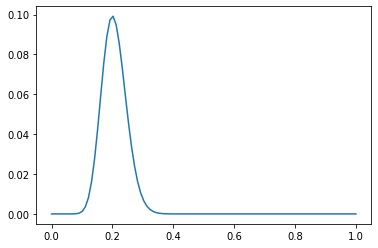

In [ ]:
plt.plot(prob,likes) 

Let's do the same for a sample of $100$ tosses with $50$ heads up. In this case, since the sample has $50$ heads up in 100 tosses, the likelihood has a maximum for the probability $0.5 = 50/100$.

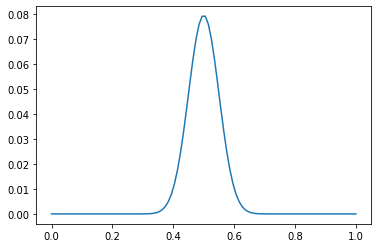

In [ ]:
lik = []
M2 = 100
m2 = 50
teste = 0

for i in range(np.size(prob)):
  ll = likelihood(prob[i],M2,m2)
  lik.append(ll)

plt.plot(prob,lik) 

The likelihood can also be analyzed by a histogram, which is ploted below. Note that there is a peak on the vicinity of $L = 0$. This happens because the likelihood  is very small for values that are different from $0.5$, which is the "correct" value for the honest coin. 

(array([78.,  4.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  4.]),
 array([0.        , 0.00791842, 0.01583684, 0.02375527, 0.03167369,
        0.03959211, 0.04751053, 0.05542896, 0.06334738, 0.0712658 ,
        0.07918422]),
 <a list of 10 Patch objects>)

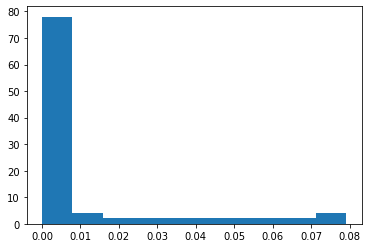

In [ ]:
plt.hist(lik,10)   